In [51]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [15]:
df = pd.read_csv('metric.csv', sep=',', header=0)

In [16]:
df.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,18:07:3,5619.0842,3357.256121,2,3.3,95.3,3.9,96.1,95.1,4.0,...,262237.2,1201518.0,0.0,1111696.8,100.0,12.2,12.2,12.6,12.2,12.8
1,18:07:4,7138.4595,5739.846500,2,3.4,94.9,3.4,96.6,94.5,4.3,...,261625.2,1204602.4,0.0,1111690.4,100.0,11.7,11.7,12.5,11.7,12.9
2,18:07:5,7246.5166,5717.215242,2,3.3,93.5,3.9,96.1,94.3,4.3,...,262295.6,1204817.6,0.0,1111693.6,100.0,16.4,16.4,16.8,16.4,17.4
3,18:08:0,7000.4212,5579.764207,2,2.9,94.5,3.9,96.1,95.1,3.7,...,261946.4,1204623.6,0.0,1111717.6,100.0,10.5,10.5,11.7,10.5,11.9
4,18:08:1,6412.3440,4424.229568,3,3.7,94.5,3.5,96.5,93.6,4.1,...,262532.8,1207575.2,0.0,1111732.0,100.0,16.0,16.0,17.2,16.0,17.8


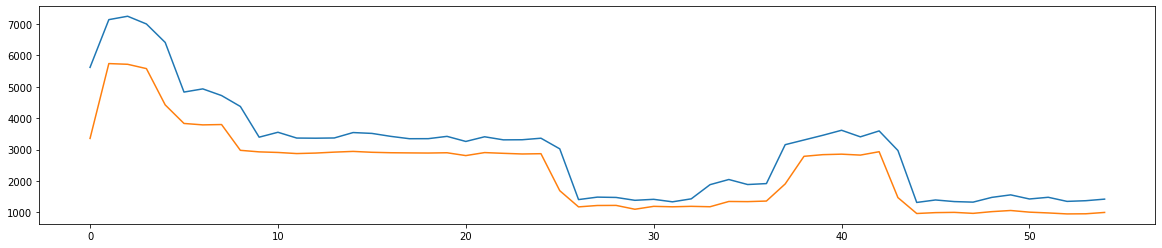

In [17]:
plt.figure(figsize=(20,4))
plt.plot(df[' response_time_p95'])
plt.plot(df[' response_time'])
plt.show()

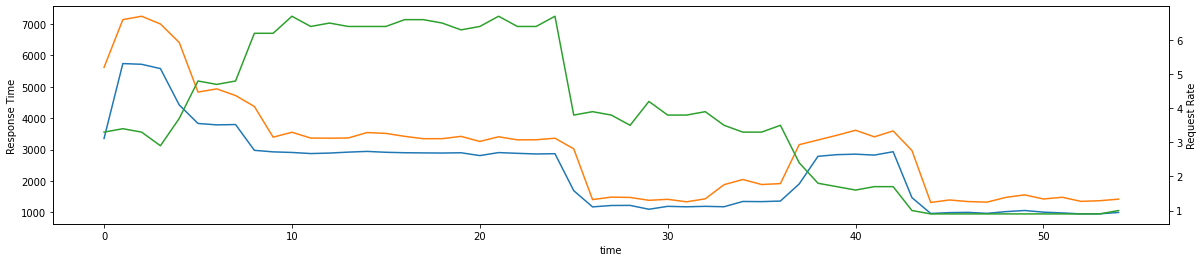

In [28]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

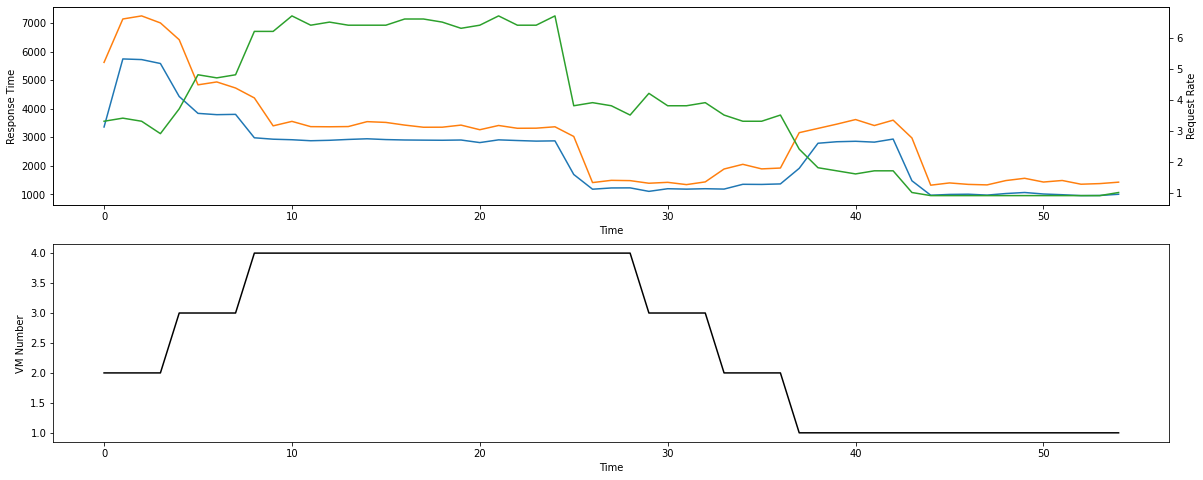

In [34]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df[' worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [65]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time,worker_number,request_rate
count,55.000000,55.000000,55.000000,55.000000
mean,3024.588458,2351.617656,2.581818,3.761818
std,1582.833122,1267.939356,1.300867,2.149719
min,1319.305000,954.398111,1.000000,0.900000
25%,1479.959300,1181.951418,1.000000,1.700000
50%,3311.973650,2826.474294,3.000000,3.700000
75%,3487.056050,2913.425386,4.000000,6.350000
max,7246.516600,5739.846500,4.000000,6.700000


In [35]:
df.columns

Index(['time', ' response_time_p95', ' response_time', ' worker_number',
       ' request_rate', 'CPU0User%', ' CPU0Idle%', ' CPU0Total%', ' CPU1User%',
       ' CPU1Idle%', ' CPU1Total%', '[DSK:sda]Reads', ' [DSK:sda]RMerge',
       ' [DSK:sda]RKBytes', ' [DSK:sda]WaitR', ' [DSK:sda]Writes',
       ' [DSK:sda]WMerge', ' [DSK:sda]WKBytes', ' [DSK:sda]WaitW',
       ' [DSK:sda]Request', ' [DSK:sda]QueLen', ' [DSK:sda]Wait',
       ' [DSK:sda]SvcTim', ' [DSK:sda]Util', '[NUMA:0]Used', ' [NUMA:0]Free',
       ' [NUMA:0]Slab', ' [NUMA:0]Mapped', ' [NUMA:0]Anon', ' [NUMA:0]AnonH',
       ' [NUMA:0]Inactive', ' [NUMA:0]Hits', '[TCPD]InReceives',
       ' [TCPD]InDelivers', ' [TCPD]OutRequests', ' [TCPD]InSegs',
       ' [TCPD]OutSegs'],
      dtype='object')

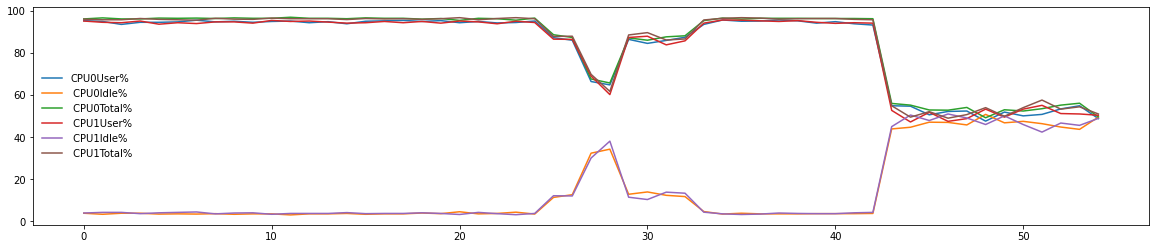

In [55]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'CPU' in col_name:
    plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [68]:
df.iloc[:, 5:11].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,83.372727,15.090909,84.867273,83.090909,15.394545,84.587273
std,17.833567,17.811745,17.876749,18.198242,18.173469,18.189303
min,47.600000,3.100000,49.200000,47.200000,3.200000,49.000000
25%,75.450000,3.600000,76.800000,76.400000,3.800000,77.950000
50%,94.300000,3.900000,96.100000,94.100000,4.200000,95.800000
75%,94.950000,23.200000,96.400000,94.800000,22.000000,96.200000
max,95.600000,50.800000,96.900000,95.600000,51.000000,96.700000


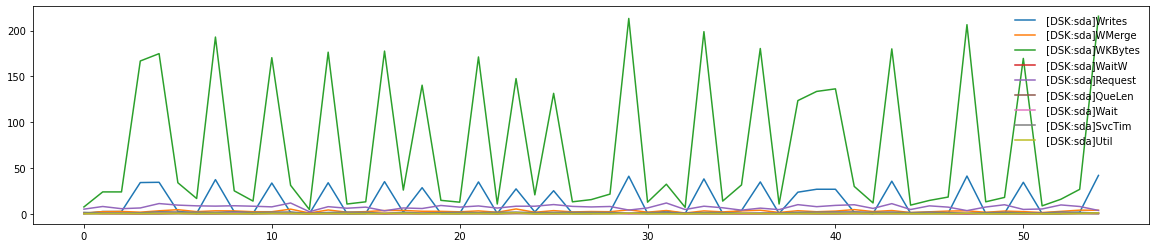

In [73]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'DSK' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [77]:
df.iloc[:, 11:24].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,55.0,55.0,55.0,55.0,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.00000,55.000000,55.000000
mean,0.0,0.0,0.0,0.0,12.930909,2.890909,73.176364,0.84000,7.438182,0.089091,0.84000,1.560000,0.414545
std,0.0,0.0,0.0,0.0,16.046597,1.035173,76.187459,0.30948,2.240576,0.085359,0.30948,0.477105,0.234456
min,0.0,0.0,0.0,0.0,0.200000,0.900000,4.800000,0.40000,2.400000,0.000000,0.40000,0.500000,0.100000
25%,0.0,0.0,0.0,0.0,0.600000,2.250000,13.600000,0.60000,5.950000,0.000000,0.60000,1.200000,0.300000
50%,0.0,0.0,0.0,0.0,2.100000,2.800000,25.200000,0.80000,7.700000,0.100000,0.80000,1.700000,0.400000
75%,0.0,0.0,0.0,0.0,31.150000,3.550000,157.200000,1.00000,8.800000,0.100000,1.00000,1.850000,0.500000
max,0.0,0.0,0.0,0.0,42.000000,5.400000,215.600000,2.00000,11.900000,0.400000,2.00000,2.400000,1.300000


In [82]:
df.iloc[:, 24:32].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,5.500000e+01,55.000000,55.00000,55.000000,5.500000e+01,55.0,5.500000e+01,55.0
mean,3.584172e+06,446367.927273,280135.44000,262323.978182,1.204719e+06,0.0,1.112366e+06,100.0
std,2.376058e+03,2376.057851,1452.87606,343.312348,1.329743e+03,0.0,4.031521e+02,0.0
min,3.577535e+06,441135.600000,277672.00000,261625.200000,1.201518e+06,0.0,1.111690e+06,100.0
25%,3.582420e+06,444927.200000,278936.40000,262092.800000,1.203877e+06,0.0,1.112046e+06,100.0
50%,3.584198e+06,446342.000000,280053.60000,262274.400000,1.204624e+06,0.0,1.112273e+06,100.0
75%,3.585613e+06,448120.200000,281302.20000,262500.800000,1.205369e+06,0.0,1.112764e+06,100.0
max,3.589404e+06,453005.200000,282620.40000,263239.600000,1.207575e+06,0.0,1.112993e+06,100.0


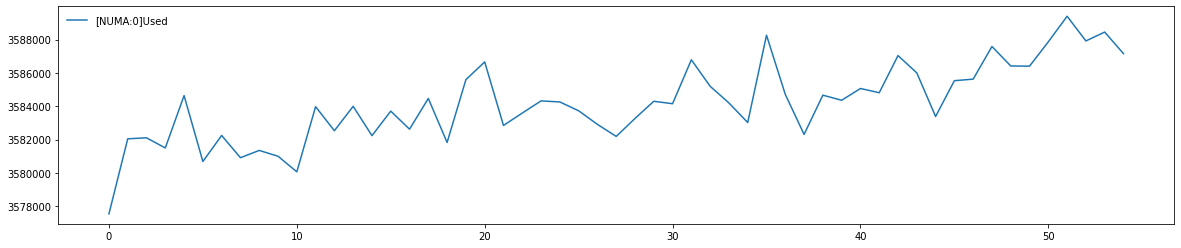

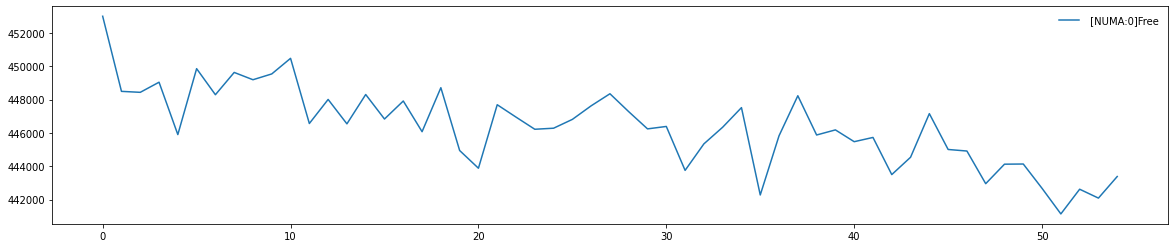

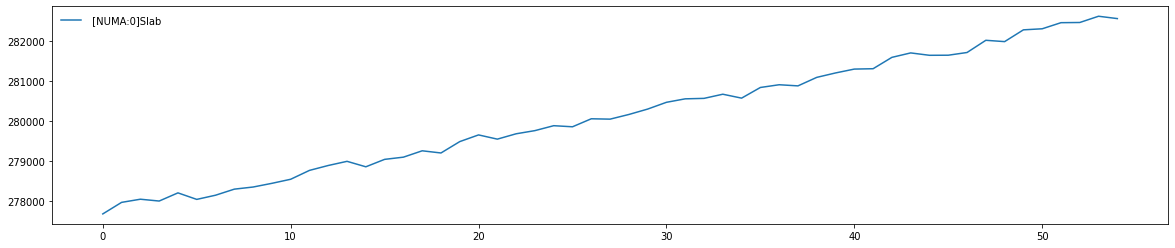

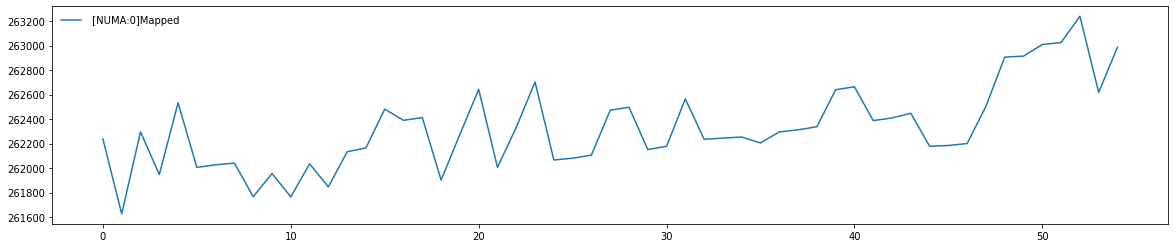

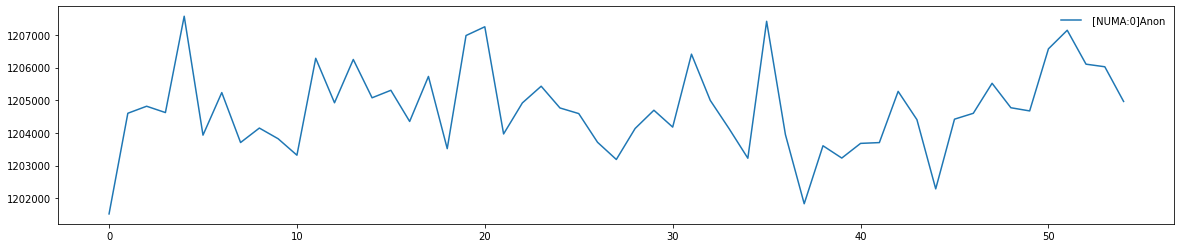

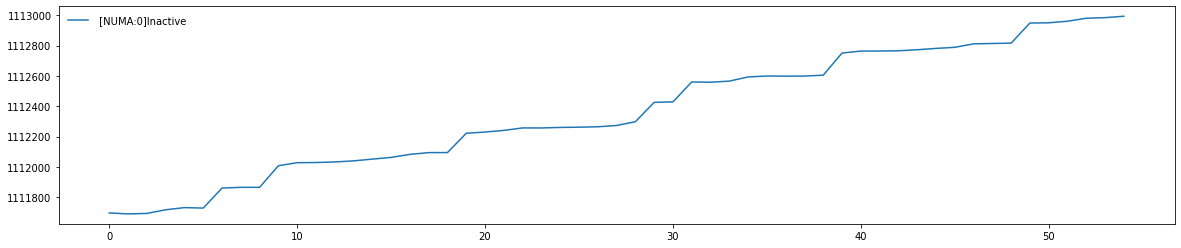

In [87]:
for col_name in df.columns:
  if 'NUMA' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.figure(figsize=(20, 4))
      plt.ticklabel_format(useOffset=False)
      plt.ticklabel_format(style='plain')
      plt.plot(df[col_name], label = col_name)
      plt.legend(frameon=False)
      plt.show()

In [ ]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'NUMA' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

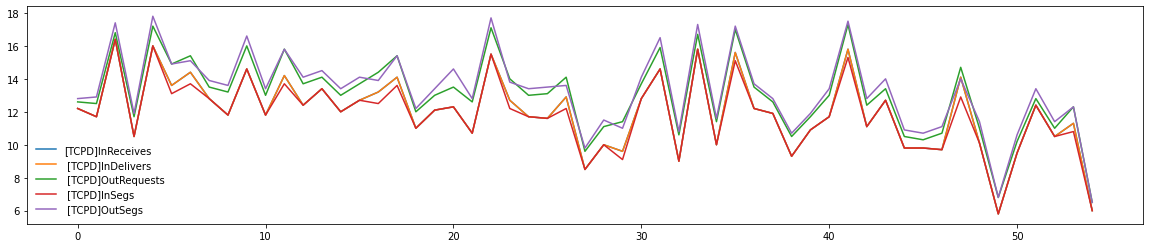

In [88]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'TCP' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()